# Data Analysis Project - Superstore

Language: Python

Dataset name: Superstore Dataset

From: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

Aim: Learn data cleaning skill

## 1. Import Libraries

In [41]:
# For data manipulation and transformation
import pandas as pd
import numpy as np

# For data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# For encoding
from sklearn.preprocessing import LabelEncoder

## 2. Import Dataset

In [42]:
# Import the dataset
df = pd.read_csv("superstore_dataset.csv", encoding="latin1", index_col=0)

# Preview the dataset
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 3. Explore the Dataset

In [43]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

Based on the results:

1. Missing values: none

2. Data types:
   - `Order Date` = object instead of datetime
   - `Ship Date` = object instead of datetime

3. Need encoding
   - `Ship Mode`
   - `Segment`
   - `Country`
   - `City`
   - `State`
   - `Region`
   - `Category`
   - `Sub-Category`
   - `Product Name`

# 4. Clean the Dataset

In [44]:
# Make a copy of df
df1 = df.copy()

### 4.1 Data Types

In [45]:
# Convert `Order Date` and `Ship Date` from object to datetime

# Create a list of columns to convert to datetime
datetime_cols = ["Order Date", "Ship Date"]

# Convert to datetime with a for loop
for col in datetime_cols:
    df1[col] = pd.to_datetime(df1[col], format="%m/%d/%Y")

# Check the results
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

### 4.2 Duplicates

In [46]:
# Check for duplicates
df1.duplicated().sum()

np.int64(1)

Based on the results, there is no duplicate.

### 4.3 Outliers

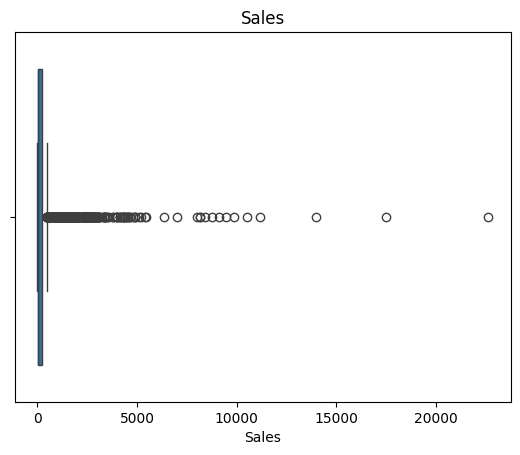

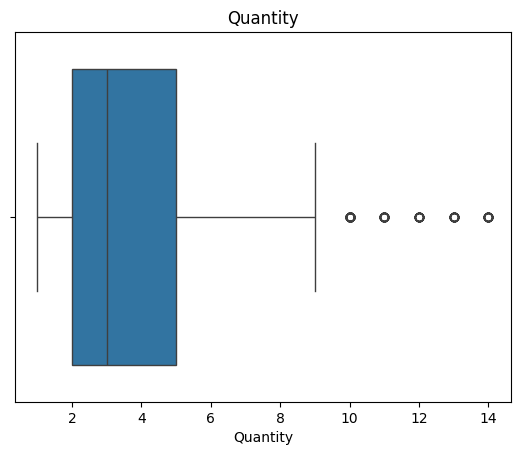

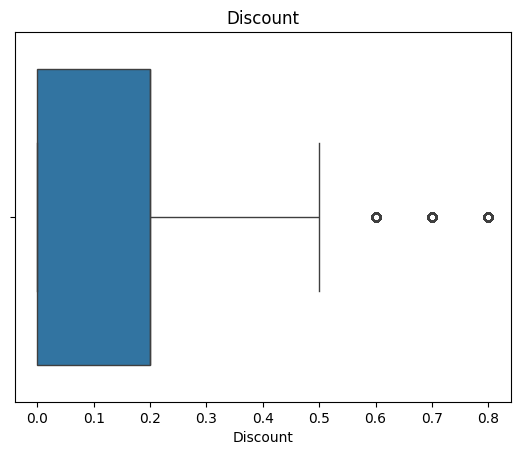

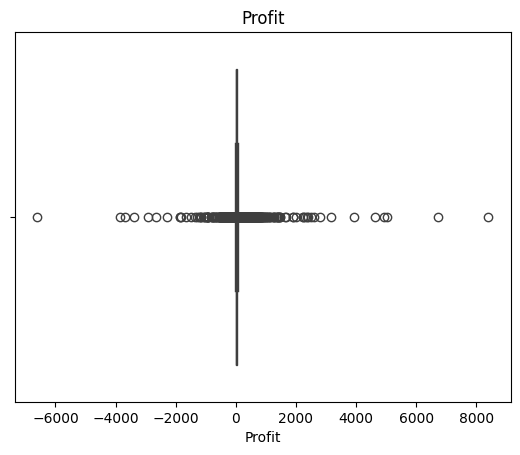

In [47]:
# Create a list of numeric variables
num_cols = df1.select_dtypes(["float", "int"]).columns.tolist()

# Remove `Postal Code`
num_cols.remove("Postal Code")

# Create box plots
for col in num_cols:
    
    # Create a box plot
    sns.boxplot(x=col,
                data=df1)
    
    # Add titles and labels
    plt.title(col)
    plt.xlabel(col)
    
    # Show the plot
    plt.show()

### 4.4 Encoding

In [49]:
# Instantiate the label encoder
lab_encoder = LabelEncoder()

# Create a list of categorical variables
cols_to_encode = df1.select_dtypes("object").columns.tolist()

# Adjust the list to exclude columns with no need for encoding
cols_to_encode = [col for col in cols_to_encode if col not in ["Order ID", "Customer ID", "Customer Name"]]

# Encode the columns with a for loop
for col in cols_to_encode:
    df1[col + "_encoded"] = lab_encoder.fit_transform(df1[col])

# Check the results
df1.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Ship Mode_encoded,Segment_encoded,Country_encoded,City_encoded,State_encoded,Region_encoded,Product ID_encoded,Category_encoded,Sub-Category_encoded,Product Name_encoded
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,2,0,0,194,15,2,12,0,4,386
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,2,0,0,194,15,2,55,0,5,839
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,2,1,0,266,3,3,946,1,10,1433
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,3,0,0,153,8,2,319,0,16,366
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,3,0,0,153,8,2,1316,1,14,573
